# Keldy: Playground

## Imports & Setup Properties

In [63]:
import os
import sys
import glob
import copy
import itertools

import h5py

import math
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit

import mpi4py

### Plotting

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.print_figure_kwargs
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

In [65]:
#Plotting Options
markslist='o^v<>dhps*HD'
cmap = plt.get_cmap('plasma')
color_list_limit = 2

def f_colorlist(i, offset = 0, cycle = color_list_limit):
    return cmap(float((i+offset)%cycle) / cycle)

def f_markslist(i, offset = 0, cycle = color_list_limit):
    return markslist[((i+offset)%cycle)]

## Keldy Import

In [66]:
import keldy.impurity_oneband_module as k_imp

## Simple Plasma

In [67]:
t_max = 10.0

def f(x):
    return x + x**2

def g(x):
    return x ** 2 / 2.0 + 1.0 / 3.0 * x**3

def g_inv(y):
    y1 = g(t_max) * y
    tmp = -1 + 12 * y1 + 2 * math.sqrt(6) * np.sqrt(y1 * (6 * y1 -1))
    return 0.5 * (-1 + 1/ np.cbrt(tmp) + np.cbrt(tmp))

def plasma_eval_1(x1):
    return f(t_max - x1)

def plasma_int_1(x1):
    return g(t_max - x1) / g(t_max)

def plasma_int_inv_1(y1):
    return t_max - g_inv(y1)

In [68]:
my_w = k_imp.WarperPlasmaSimpleT(f, t_max, 100000)

In [69]:
my_w.ui_from_li(np.array([0.0, 0.1, 0.5]))

[10.0, 5.589137706528816, -2.2552429677639525]

In [70]:
my_w.li_from_ui(np.array([5,1,0]))

[0.1413043478541583, 0.07652173915157671, 0.0021739130448733056]

In [71]:
my_w.jacobian(np.array([0.1]))

0.041899613739954863

In [72]:
my_w.evaluate_warping_function([0.0, 0.1, 0.5])

2.376

### Evaluate Plasma

In [73]:
t = np.linspace(0,10,100)
t_list = [list([t0]) for t0 in t]
warp_f_eval = np.array(map(my_w.evaluate_warping_function, t_list)).flatten()

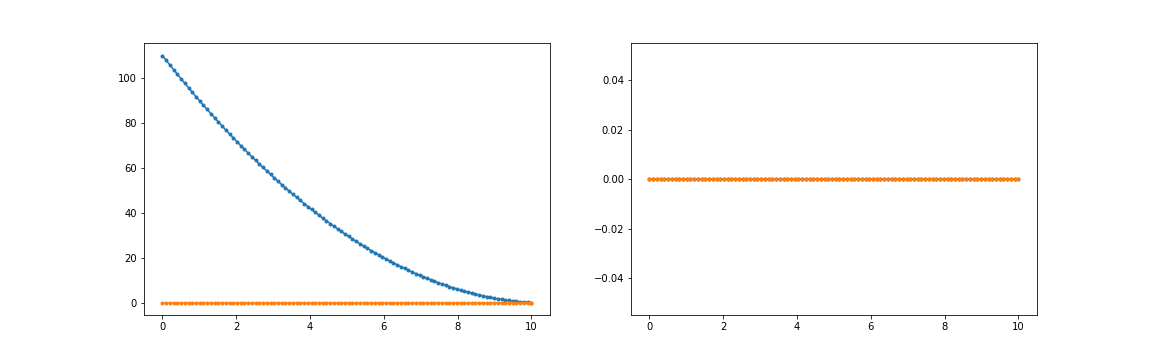

In [74]:
fig = plt.figure(figsize=(16,5))
ax0 = plt.subplot(1,2,1)
ax0.plot(t, warp_f_eval.real, marker='o', markersize=3)
ax0.plot(t, warp_f_eval.imag, marker='o', markersize=3)

ax1 = plt.subplot(1,2,2)
ax1.plot(t, (warp_f_eval.real - plasma_eval_1(t).real) , marker='o', markersize=3)
ax1.plot(t, (warp_f_eval.imag - plasma_eval_1(t).imag) , marker='o', markersize=3)
# ax1.set_yscale('log')

plt.show()

### Evaluate Integral (forward)

In [75]:
t = np.linspace(0.0,10.0,100)
t_list = [list([t0]) for t0 in t]
warp_f_int = np.array(map(my_w.li_from_ui, t_list)).flatten()

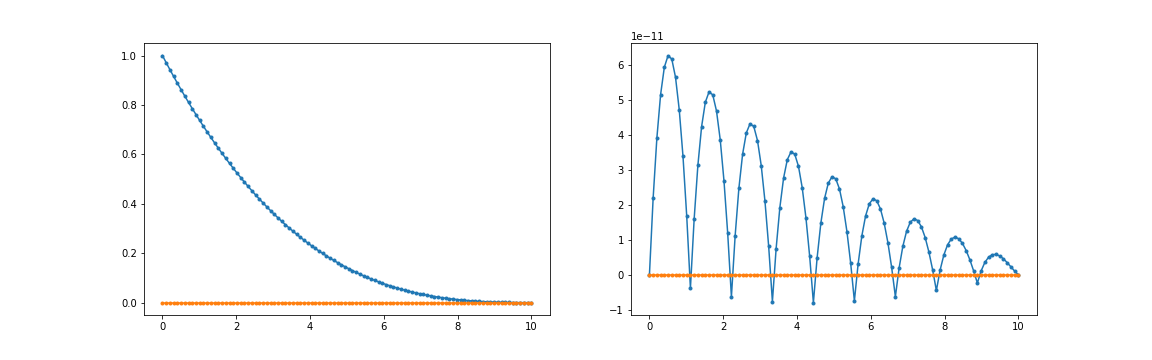

In [76]:
fig = plt.figure(figsize=(16,5))
ax0 = plt.subplot(1,2,1)
ax0.plot(t, warp_f_int.real, marker='o', markersize=3)
ax0.plot(t, warp_f_int.imag, marker='o', markersize=3)

ax1 = plt.subplot(1,2,2)
ax1.plot(t, warp_f_int.real - plasma_int_1(t).real , marker='o', markersize=3)
ax1.plot(t, warp_f_int.imag - plasma_int_1(t).imag , marker='o', markersize=3)
# ax1.set_yscale('log')

plt.show()

### Evaluate Integral (Reverse)

In [77]:
t = np.linspace(0.00001,1.0,100)
t_list = [list([t0]) for t0 in t]
warp_f_int_inv = np.array(map(my_w.ui_from_li, t_list)).flatten()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


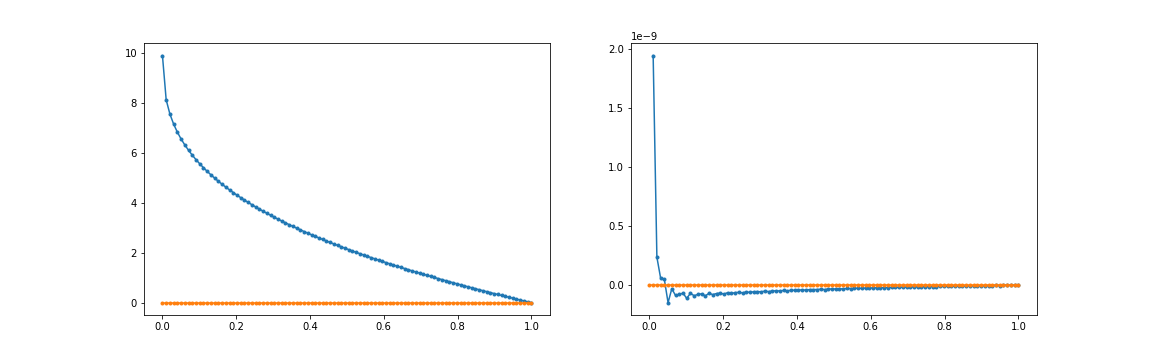

In [78]:
fig = plt.figure(figsize=(16,5))
ax0 = plt.subplot(1,2,1)
ax0.plot(t, warp_f_int_inv.real, marker='o', markersize=3)
ax0.plot(t, warp_f_int_inv.imag, marker='o', markersize=3)

ax1 = plt.subplot(1,2,2)
ax1.plot(t, warp_f_int_inv.real - plasma_int_inv_1(t).real , marker='o', markersize=3)
ax1.plot(t, warp_f_int_inv.imag - plasma_int_inv_1(t).imag , marker='o', markersize=3)
# ax1.set_yscale('log')

plt.show()

### ui <-> vi

In [79]:
k_imp.vi_from_ui(10, np.array([5,1,0]))

[5.0, 4.0, 1.0]

In [80]:
k_imp.vi_from_ui(10, np.array([0, 5.5, 2,  4, 5, 6]))

[4.0, 0.5, 0.5, 1.0, 2.0, 2.0]

In [81]:
k_imp.ui_from_vi(10, [4.0, 0.5, 0.5, 1.0, 2.0, 2.0])

[6.0, 5.5, 5.0, 4.0, 2.0, 0.0]